#### Author: Peco Myint
#### Last edit: 07/12/2019

# Data and parameters initialization

In [1]:
import numpy as np
from numpy import r_
import scipy as sp
from scipy import optimize # for savitzky golay
from scipy import signal #used for savitzky golay smoothening
from ipywidgets import interactive #for interactive plotting / making a movie for the scatterin events
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt #plotting figures
from matplotlib.pyplot import figure,plot,imshow
import time #for timing
from tqdm import tqdm_notebook as tqdm #for progress bar
import matplotlib as mpl
mpl.rcParams['image.origin']='lower'
mpl.rcParams['image.interpolation']='none'
mpl.rcParams['figure.max_open_warning']=40
import datadesc as DD
import glob, os
DD.DD={}

############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################
"""
Edit the following if you want to look at a different data file
"""
DD.DD['Datalabel'] = 'A011'
"""
Find the right data file. you will have to researt the Kernel if python can't find 
the following file. That means data file is loaded and Jupyter is looking
at a different directory now
"""
%run -i '/projectnb/ludwiggrp/Peco Myint/Ma_APS_Apr_2018/ludwig201804/Read_metadata.py'

#run -i '/projectnb/ludwiggrp/Peco Myint/Mahsa_APS Nov 2017/ludwig201711/Read_metadata.py'
############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################

#look at some of the information on data set, stored in DD
for k in sorted(DD.DD.keys()):
    print("DD.DD[{:s}]={}".format(k,DD.DD[k])) #print all the metadata

#provode necessary values for data analysis
global ccdx, ccdz, x0, y0, ccdx0, ccdz0, d, E, alpha_i, datatakingtime
#ccd positions during data acquisition
ccdx=DD.DD['ccdx']
ccdz=DD.DD['ccdz']

#incident beam info
x0 = DD.DD['x0'] 
y0 = DD.DD['y0'] 
ccdx0=DD.DD['ccdx0']
ccdz0=DD.DD['ccdz0']

#the following are detector distance, Energy and incident angles
d=DD.DD['rr']
E=DD.DD['energy']*1.602*1E-16
alpha_i=DD.DD['nominal_angle']*(np.pi/180)

#time used to take a single frame
datatakingtime = DD.DD['preset']

%matplotlib notebook  


total time: 0.011614561080932617
DD.DD[Datafolder]=A011_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001
DD.DD[Datalabel]=A011
DD.DD[airgap]=240
DD.DD[batchinfo]=A011_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001_0001-2269.batchinfo
DD.DD[batchinfo_ver]=14
DD.DD[bstop]=130
DD.DD[ccd_speed]=1
DD.DD[ccdroi]=[1, 516, 1, 1556]
DD.DD[ccdx]=171
DD.DD[ccdx0]=212.5
DD.DD[ccdxspec]=190
DD.DD[ccdz]=66
DD.DD[ccdz0]=36.5
DD.DD[ccdzspec]=89
DD.DD[child]=A011_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001/
DD.DD[close_delay]=0.002
DD.DD[col_beg]=0
DD.DD[col_end]=1555
DD.DD[cols]=1556
DD.DD[compression]=0
DD.DD[darkname]=/projectnb/ludwiggrp/Peco Myint/Ma_APS_Apr_2018/ludwig201804/A011_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001/A011_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001_00001-04000.imm
DD.DD[data_scanN]=142
DD.DD[datafilename]=A011_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001_00001-04000.imm
DD.DD[detector]=25
DD.DD[end_time]=Thu Apr 05 13:50:03 2018
DD.DD[energy]=10.91
DD.DD[filename]=

# Plot a frame & see the scattering pattern evolve

<IPython.core.display.Javascript object>


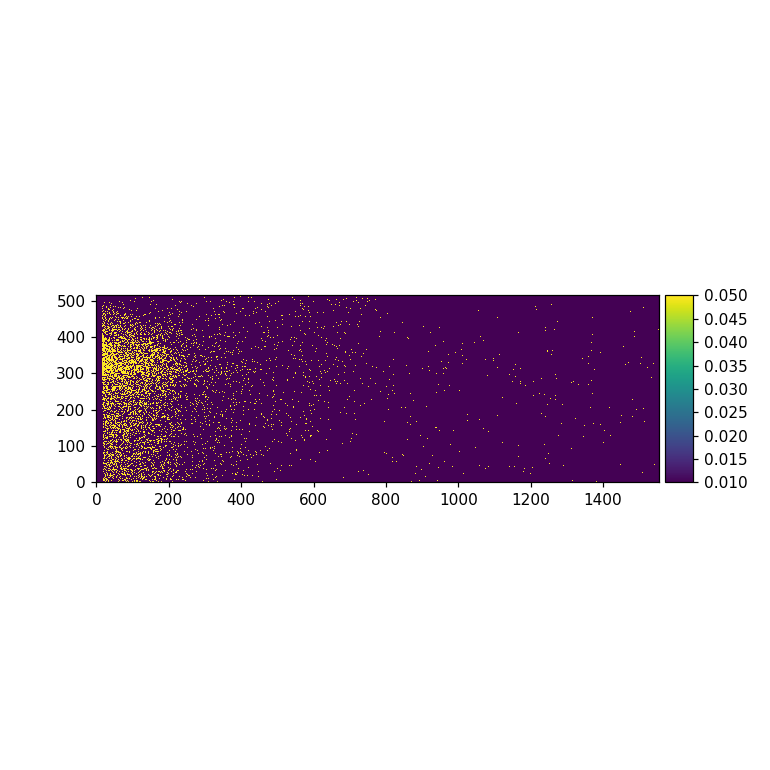

In [3]:
#Plot any frame
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.figure(figsize=(7,7))
ax = plt.gca()

############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################
"""
Define what frame you would like to look at
"""
frame_no = 200
min_scale = 0.01
max_scale = 0.05
############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################


im = imshow(DD.FD.rdframe(frame_no),vmin = min_scale, vmax= max_scale)
plt.grid(False)


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#print(DD.FD.rdframe(3)[295:305,295:305])

### First, let's quickly look at intensity over time and an average image of the entire data acquisition

<IPython.core.display.Javascript object>


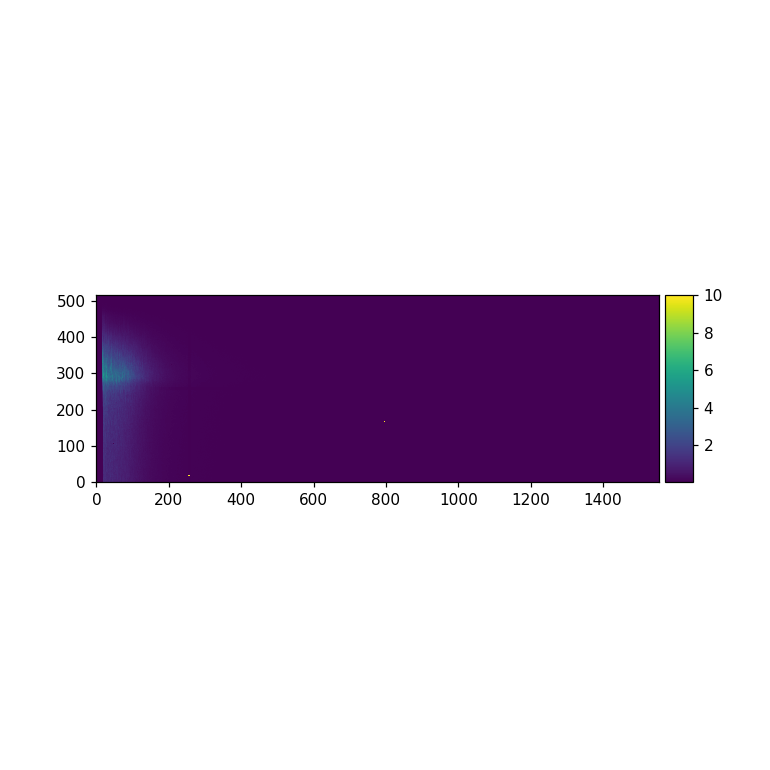

<IPython.core.display.Javascript object>


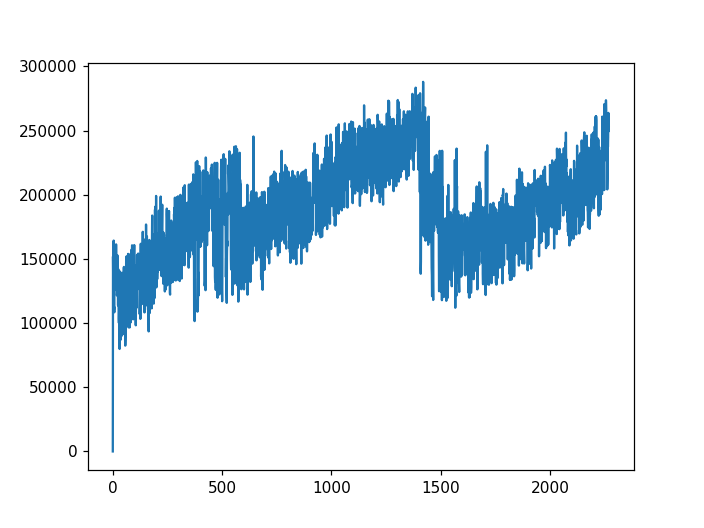

In [10]:
#find average image over run
#plot the summed intensity over time
ta = time.time()

mask=DD.mask
Is=np.zeros(DD.DD['numberfiles'])
avgimg = DD.FD.rdframe(DD.DD['firstfile']);
ii,jj=np.where(mask==1)
Is[0]=np.sum(avgimg[ii,jj])
pos=1

for i in tqdm(range(1+DD.DD['firstfile'],DD.DD['firstfile']+DD.DD['numberfiles'])):
    img = DD.FD.rdframe(i)
    avgimg += img
    Is[pos]=np.sum(img[ii,jj])
    pos = pos + 1

avgimg /= np.float32(DD.DD['numberfiles'])
tb = time.time()

#plot it
plt.figure(figsize=(7,7))
ax = plt.gca()


im = imshow(avgimg,vmin = 0.01, vmax=10)
plt.grid(False)


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)




figure()
plot(Is)
#print(np.sum(avgimg[337:357,23:43]))
#print("total time: {0}".format(tb-ta))

# Define basic functions to process data for ROI

In [4]:
"""Load the functions to do Static Analysis"""
%run -i '/projectnb/ludwiggrp/Peco Myint/Static_analysis.py'
"""Look inside the Static_analysis.py file to see what funcations are available"""

'Look inside the Static_analysis.py file to see what funcations are available'

In [3]:
"""this file includes functions that plot and fit R when R values obtained from read_and_get_R_along_q_parallel 
You may store the extracted R values for later analysis. 
"""
%run -i '/projectnb/ludwiggrp/Peco Myint/Amplification_factors.py'

"""Look inside the Amplification_factors.py file to see what funcations are available"""

'Look inside the Amplification_factors.py file to see what funcations are available'

## Extract R values

In [8]:
#read_and_plot_intensity_along_q_parallel(300,320,10,500,10,1,DD.DD['numberfiles'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

# Fit R vs q

In [9]:
#np.save('Rvalues',R) #Save extracted R values
R = np.load('Rvaluesmodified_PM20190203.npy') #load saved R values
R= R[5:-3]
plotandfit_R(R,200,400,200,700,10,30,80)
#plotRs(R,200,400,30,800,10,30,80)

FileNotFoundError: [Errno 2] No such file or directory: 'Rvaluesmodified_PM20190203.npy'

<IPython.core.display.Javascript object>


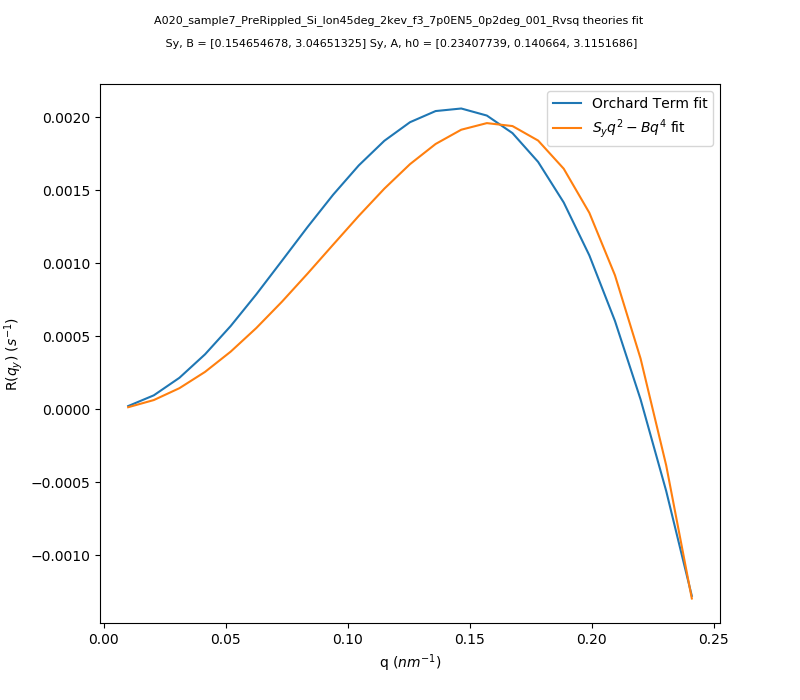

In [67]:
"""
Plot your R fits 
"""
plt.figure(figsize=(8,7))
#plt.scatter(R[:,0], R[:,1]*1E3*0.1, color = 'black', marker = '.', label='data') 
params = [0.154654678, 3.04651325]
paramsOrchard = [0.23407739, 0.140664, 3.1151686]
#Re = np.arange(0.01,0.35,(R[:,0][1]-R[:,0][0]))
Re = np.arange(0.01,0.25,0.0105)


plt.plot(Re, Rwithorchard(Re, paramsOrchard[0], paramsOrchard[1],paramsOrchard[2] ),label='Orchard Term fit')
plt.plot(Re, long_wave_form(Re, params[0],params[1]),label=r'$S_{y}q^{2} - Bq^{4}$ fit') 
plt.ylabel(r'R($q_{y}$) ($s^{-1}$)')
plt.xlabel(r'q ($nm^{-1}$)')
plt.legend(loc='best')
plt.suptitle('A020_sample7_PreRippled_Si_Ion45deg_2kev_f3_7p0EN5_0p2deg_001_Rvsq theories fit'+' \n \n Sy, B = {0}'.format(params)+ 
                 ' Sy, A, h0 = {0}'.format(paramsOrchard), fontsize=8)

plt.show()

# Now let's do general analysis for different data sets. 

# Put datanames of interest in "listtolook". And get Avg detector image over time plots. 

total time: 0.013641119003295898


<IPython.core.display.Javascript object>


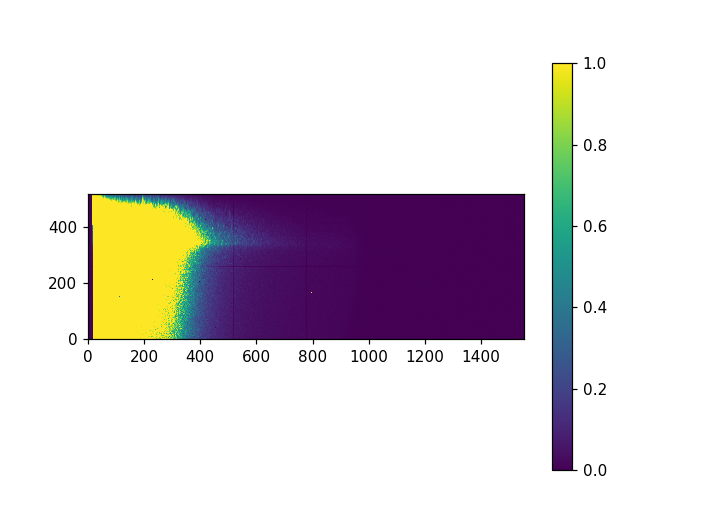

<IPython.core.display.Javascript object>


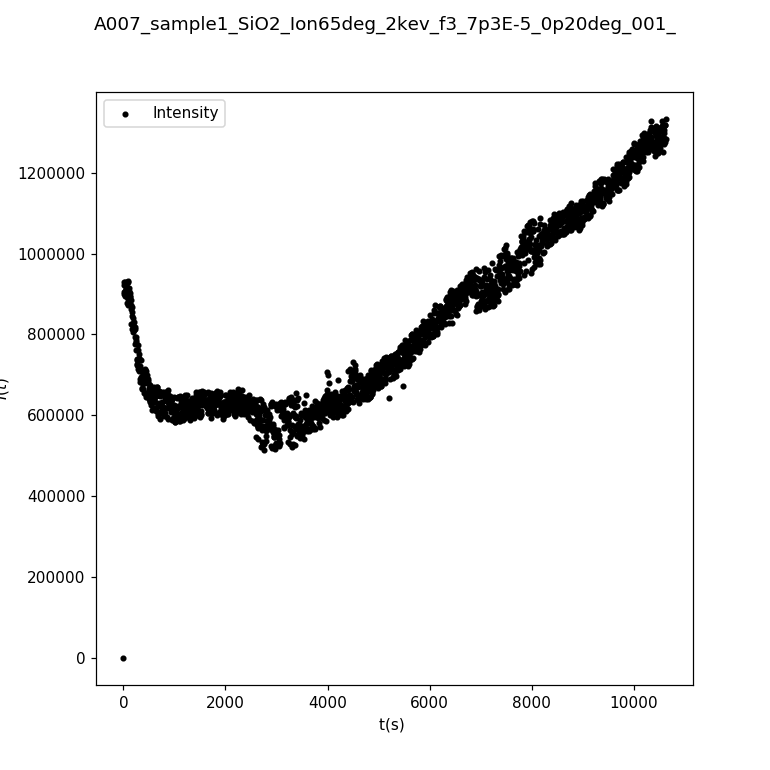

total time: 0.007071256637573242


<IPython.core.display.Javascript object>


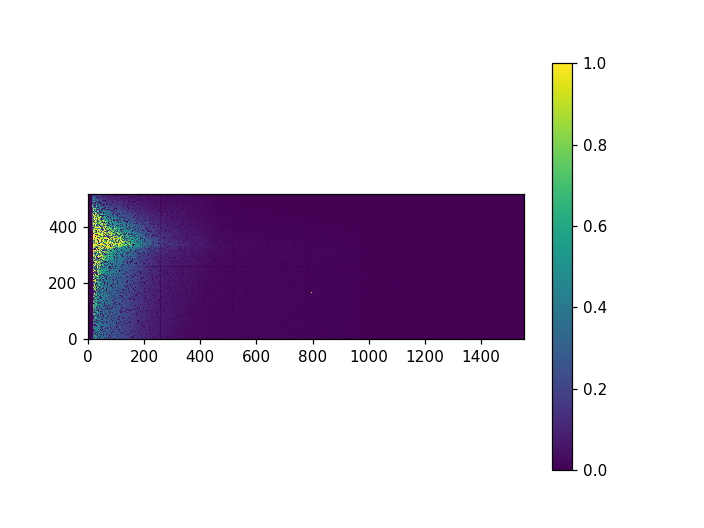

<IPython.core.display.Javascript object>


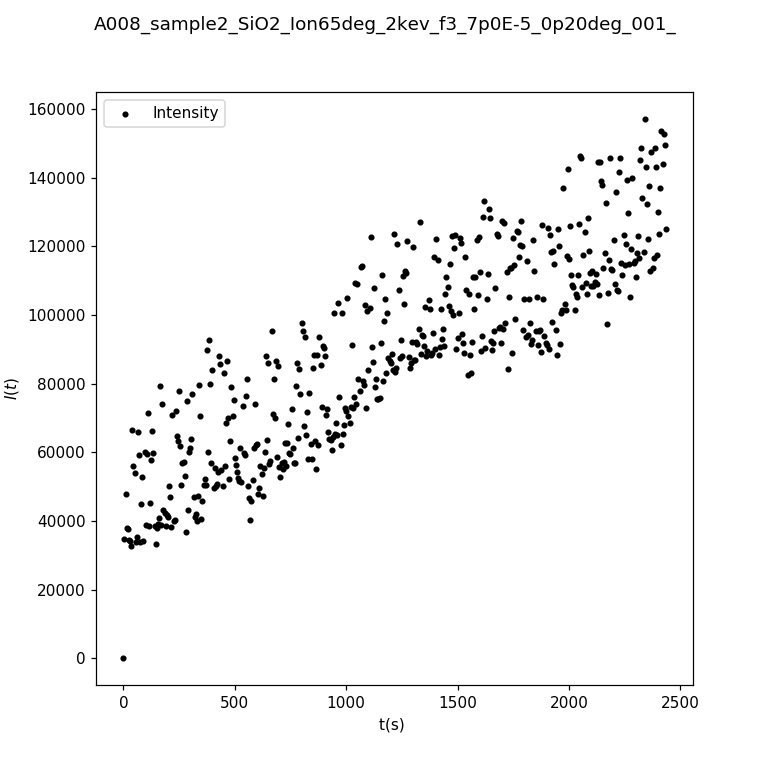

total time: 0.008538246154785156


<IPython.core.display.Javascript object>


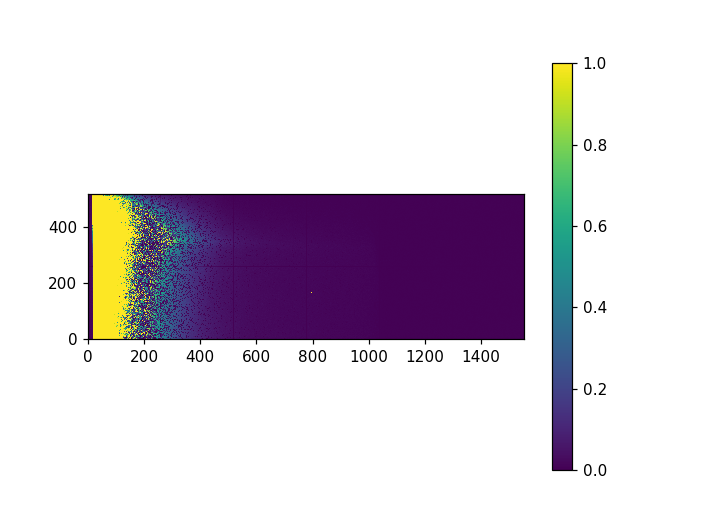

<IPython.core.display.Javascript object>


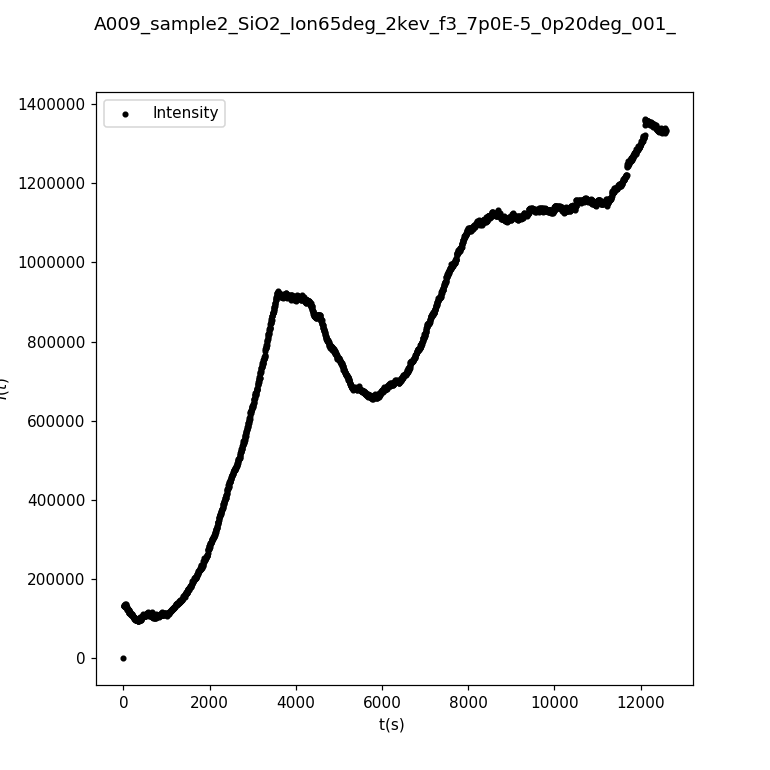

total time: 0.010750532150268555


<IPython.core.display.Javascript object>


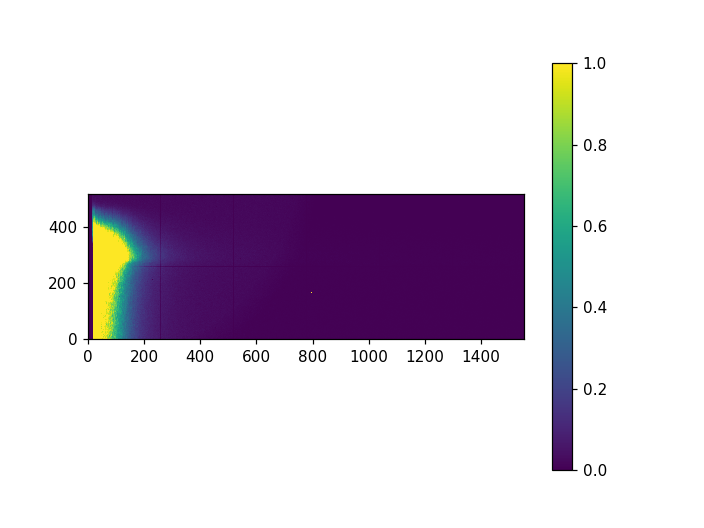

<IPython.core.display.Javascript object>


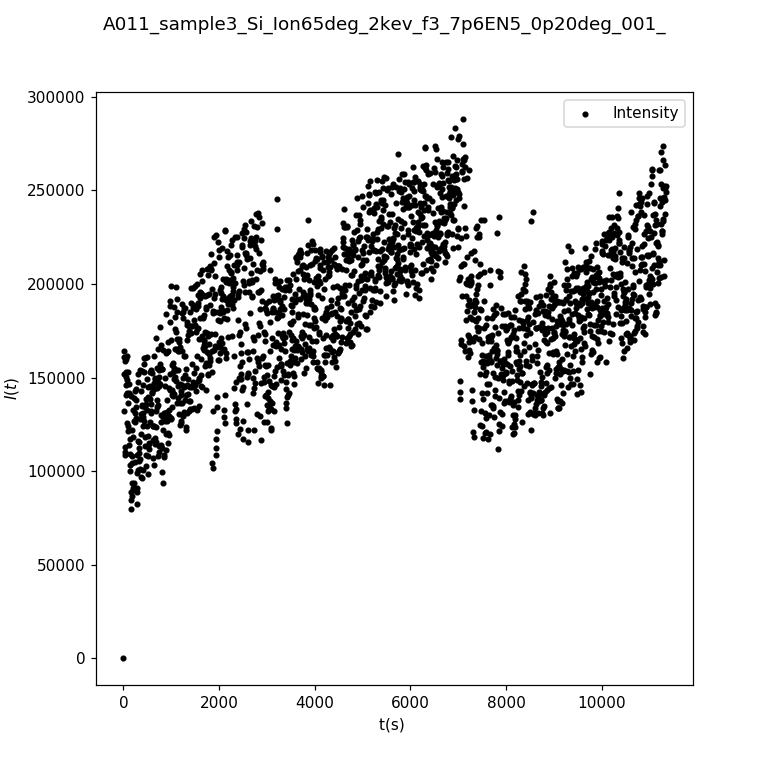

total time: 0.007219076156616211


<IPython.core.display.Javascript object>


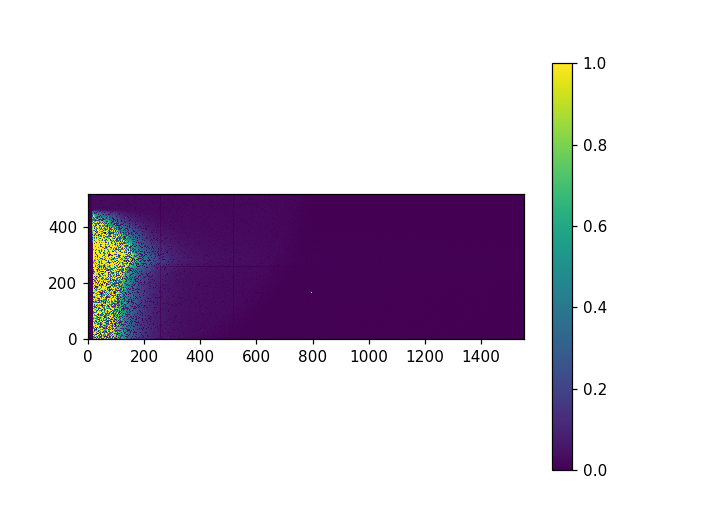

<IPython.core.display.Javascript object>


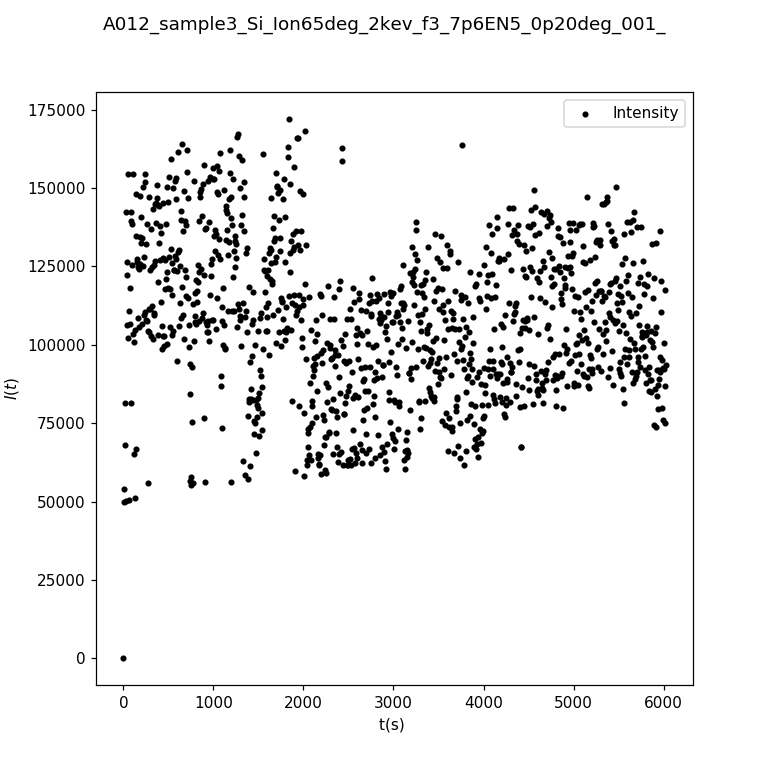

total time: 0.006891727447509766


<IPython.core.display.Javascript object>


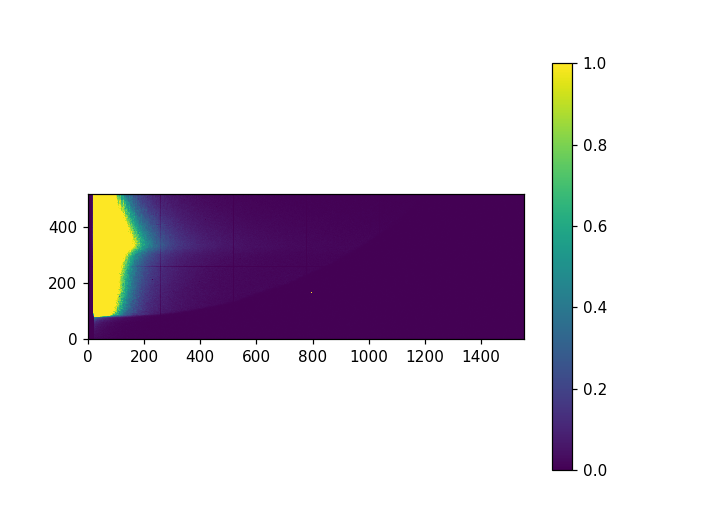

<IPython.core.display.Javascript object>


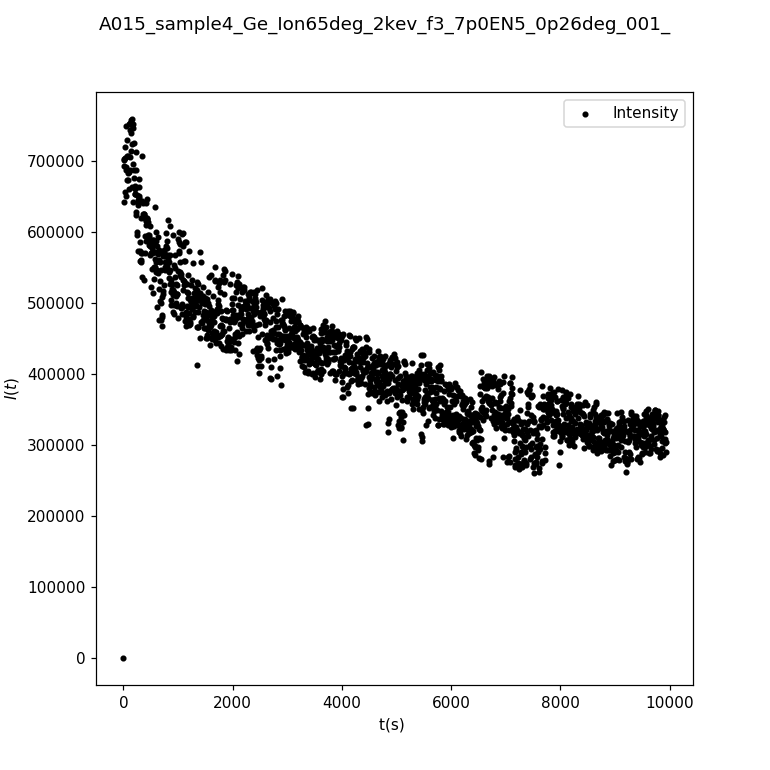

total time: 0.008469343185424805


<IPython.core.display.Javascript object>


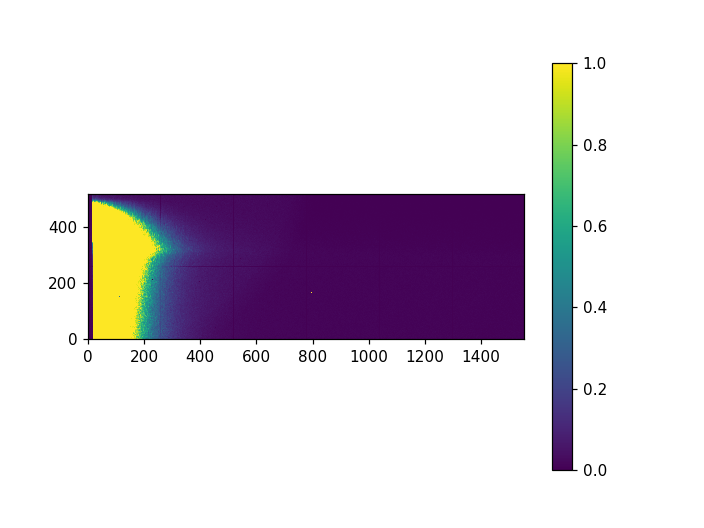

<IPython.core.display.Javascript object>


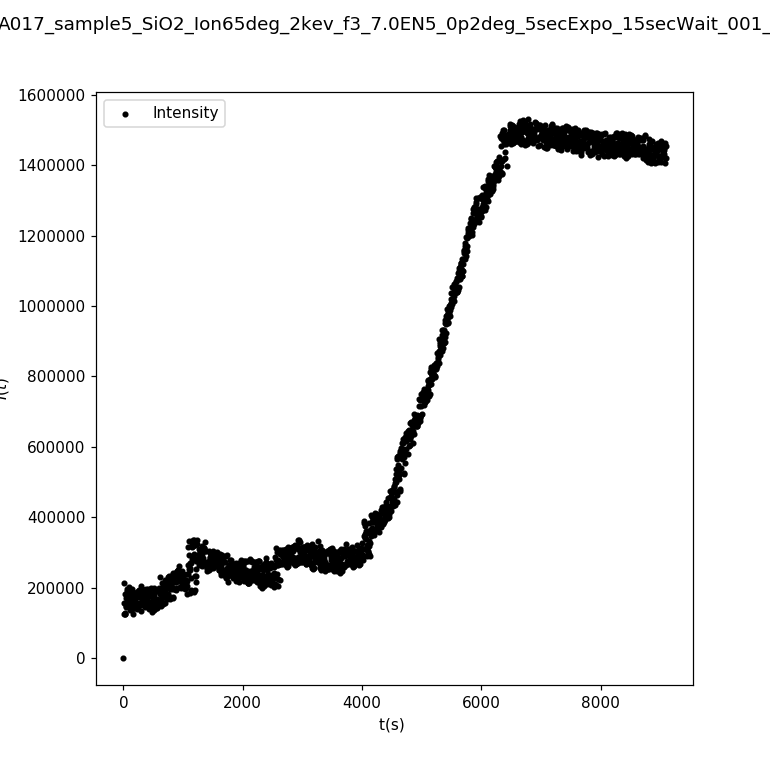

total time: 0.011779069900512695


<IPython.core.display.Javascript object>


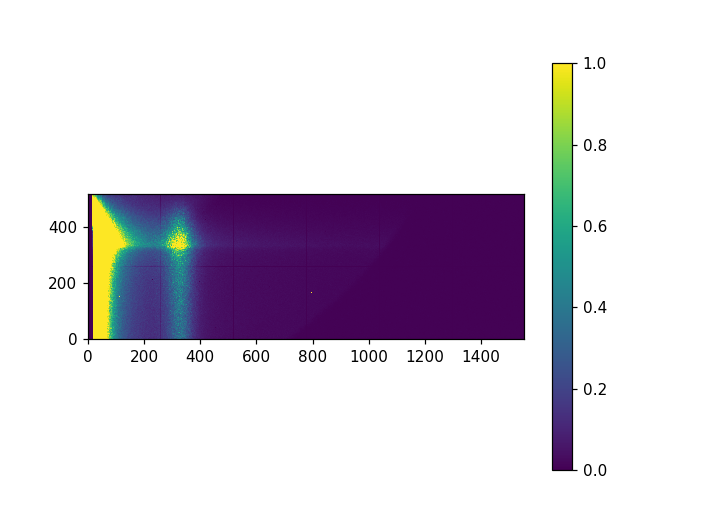

<IPython.core.display.Javascript object>


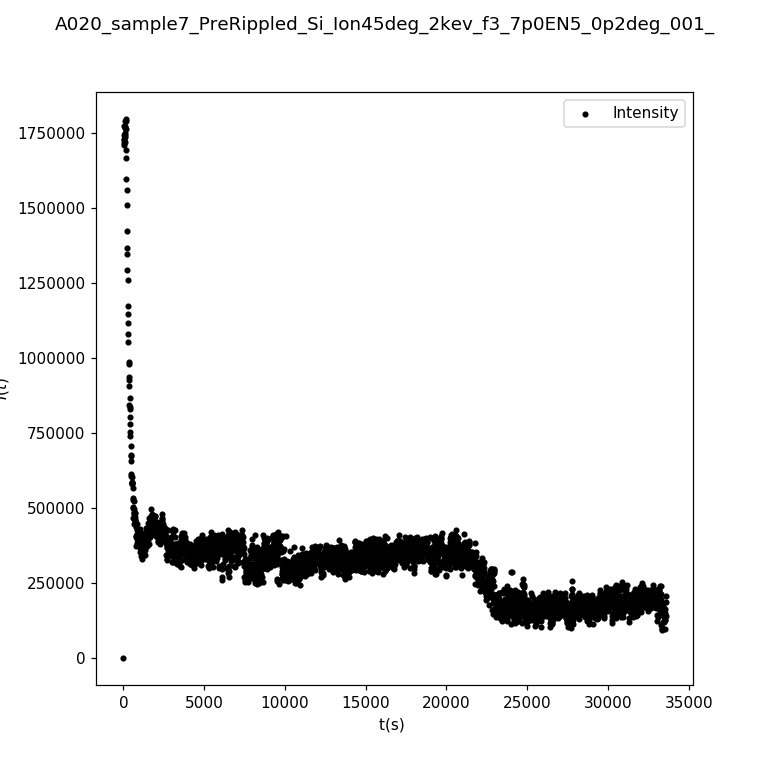

total time: 0.012022256851196289


<IPython.core.display.Javascript object>


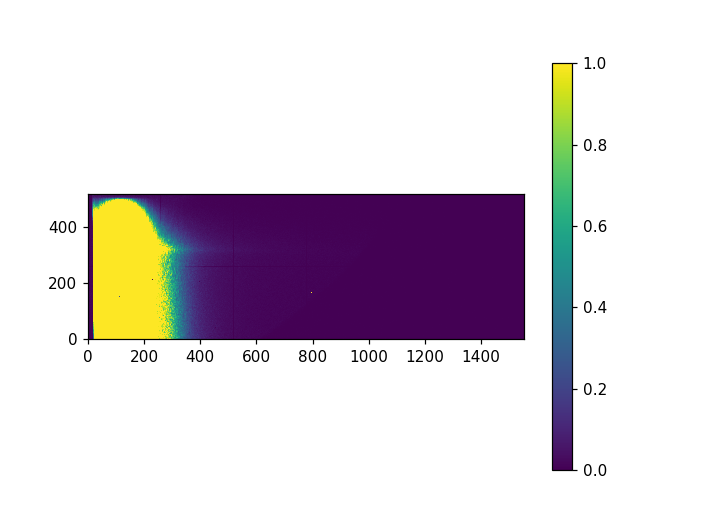

<IPython.core.display.Javascript object>


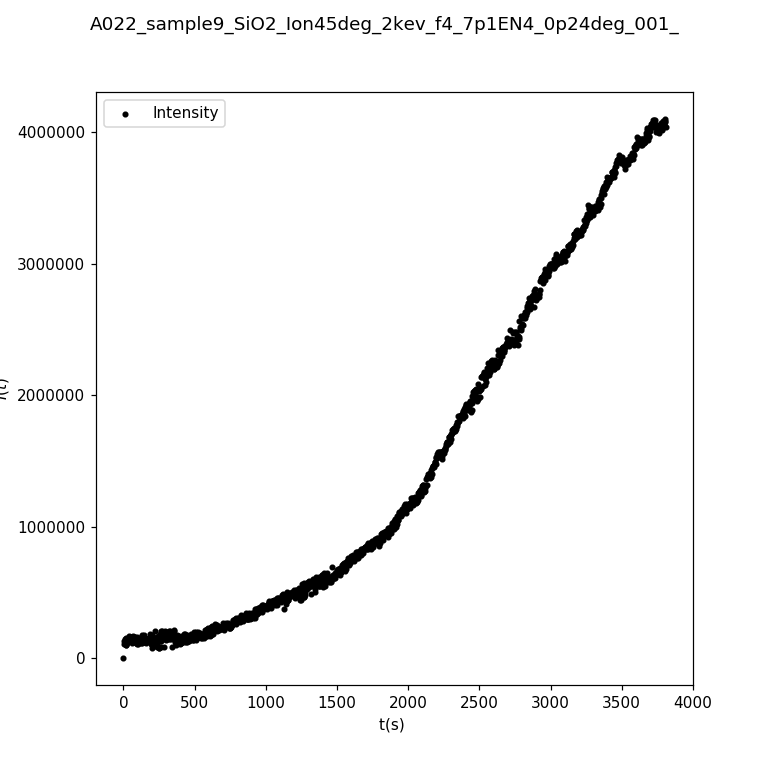

total time: 0.006159543991088867


<IPython.core.display.Javascript object>


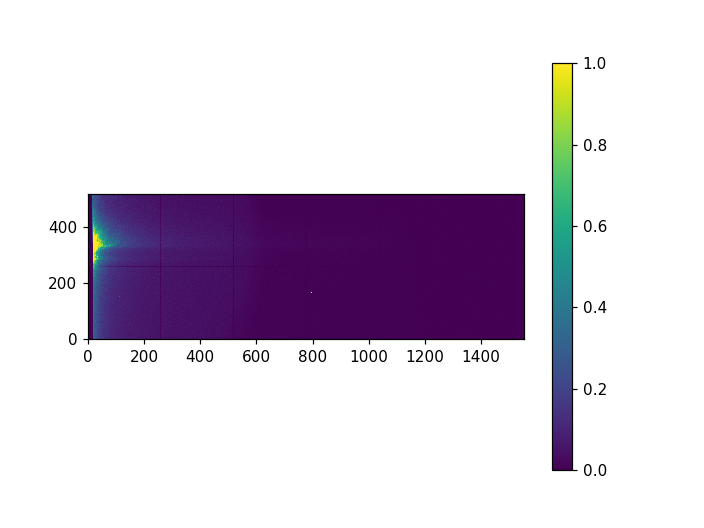

<IPython.core.display.Javascript object>


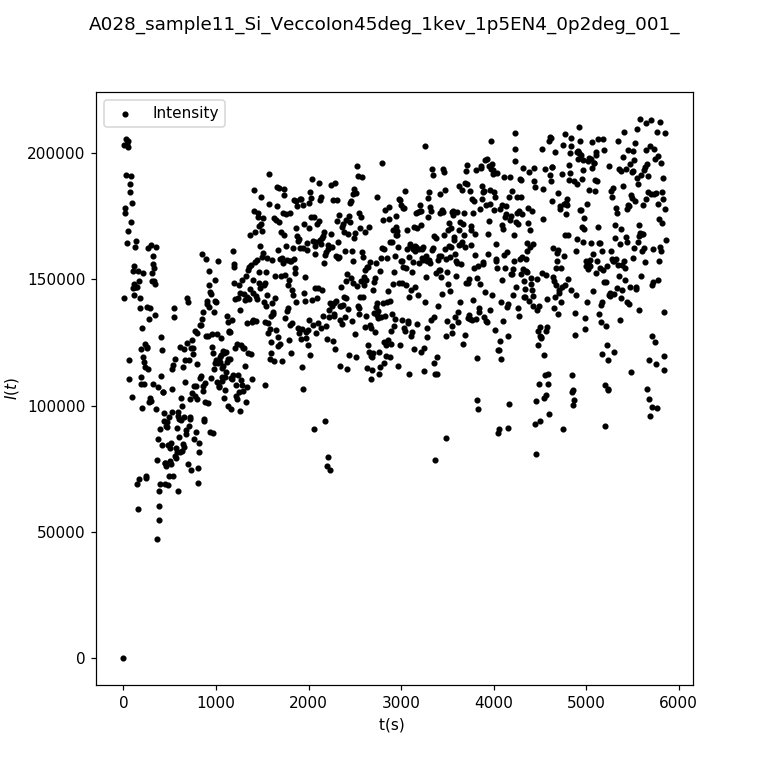

total time: 0.00698089599609375


<IPython.core.display.Javascript object>


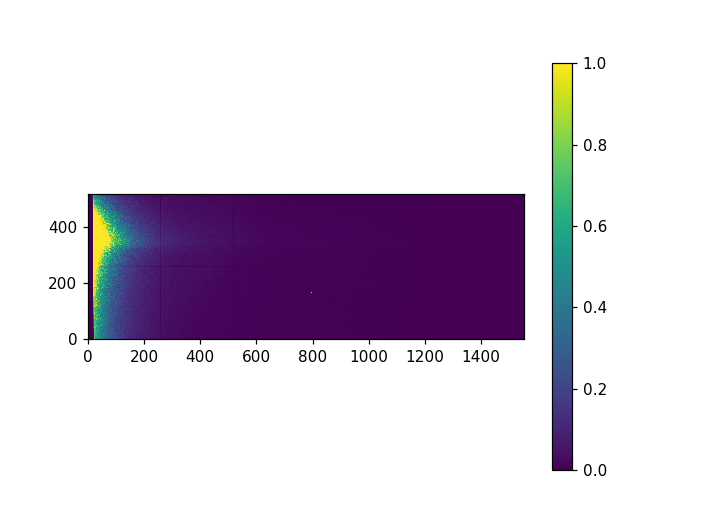

<IPython.core.display.Javascript object>


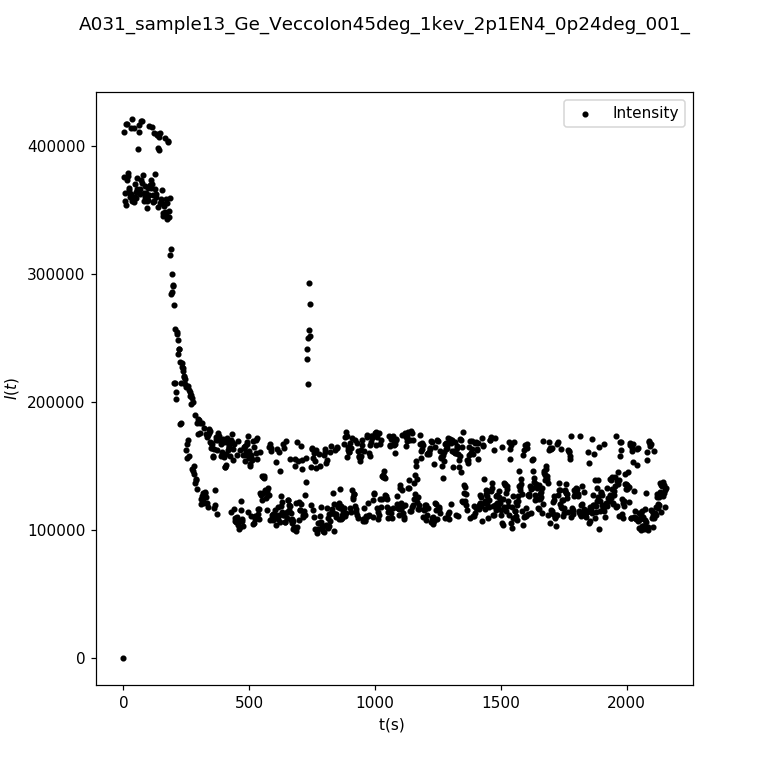

In [3]:
import numpy as np
from numpy import r_
import scipy as sp
from scipy import optimize # for savitzky golay
from scipy import signal #used for savitzky golay smoothening
from ipywidgets import interactive #for interactive plotting / making a movie for the scatterin events
%matplotlib notebook
import matplotlib.pyplot as plt #plotting figures
from matplotlib.pyplot import figure,plot,imshow
import time #for timing
from tqdm import tqdm_notebook as tqdm #for progress bar
import matplotlib as mpl
mpl.rcParams['image.origin']='lower'
mpl.rcParams['image.interpolation']='none'
mpl.rcParams['figure.max_open_warning']=40
import datadesc as DD
import glob, os
listtolook = ['A007','A008','A009','A011','A012','A015','A017','A020','A022','A028','A031']
for i in tqdm(range(len(listtolook))):
    DD.DD={}

    ############################################################################################################
    ########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
    ############################################################################################################
    """
    Edit the following if you want to look at a different data file
    """
    DD.DD['Datalabel'] = listtolook[i]
    ############################################################################################################
    ########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
    ############################################################################################################

    """
    Load the data info. you will have to researt the Kernel if python can't find 
    the following file. That means data file is loaded and Jupyter is looking
    at a different directory now
    """
    %run -i '/projectnb/ludwiggrp/Peco Myint/Ma_APS_Apr_2018/ludwig201804/Read_metadata.py'

    #provode necessary values for data analysis
    global ccdx, ccdz, x0, y0, ccdx0, ccdz0, d, E, alpha_i, datatakingtime
    #ccd positions during data acquisition
    ccdx=DD.DD['ccdx']
    ccdz=DD.DD['ccdz']

    #incident beam info
    x0 = DD.DD['x0'] 
    y0 = DD.DD['y0'] 
    ccdx0=DD.DD['ccdx0']
    ccdz0=DD.DD['ccdz0']

    #the following are detector distance, Energy and incident angles
    d=DD.DD['rr']
    E=DD.DD['energy']*1.602*1E-16
    alpha_i=DD.DD['nominal_angle']*(np.pi/180)

    #time used to take a single frame
    datatakingtime = DD.DD['preset']
    
    #find average image over run
    #plot the summed intensity over time
    ta = time.time()

    mask=DD.mask
    Is=np.zeros((DD.DD['numberfiles'],2))
    avgimg = DD.FD.rdframe(DD.DD['firstfile']);
    ii,jj=np.where(mask==1)
#     Is[0,0]=0
#     Is[0,1]=np.sum(avgimg[ii,jj])
    pos=1

    for i in tqdm(range(1+DD.DD['firstfile'],DD.DD['firstfile']+DD.DD['numberfiles'])):
        img = DD.FD.rdframe(i)
        avgimg += img
        Is[pos,0] = pos*datatakingtime
        Is[pos,1] =np.sum(img[ii,jj])
        pos = pos + 1

    avgimg /= np.float32(DD.DD['numberfiles'])
    tb = time.time()

    #plot it
    plt.figure(figsize=(7,7))
    ax = plt.gca()


    im = imshow(avgimg,vmin = 0.01, vmax=10)
    plt.grid(False)


    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    
    
    
    
    plt.figure(figsize=(7,7))
    plt.scatter(Is[:,0], Is[:,1], color = 'black', marker = '.', label='Intensity') 

    plt.ylabel(r'$I(t)$')
    plt.xlabel(r't(s) ')
    plt.suptitle(np.str_(DD.DD['name']))
    try:
        plt.savefig(np.str_(DD.DD['name'])[:40] + 'SummedIntensity_over_time')
    except:
        pass
    plt.legend(loc='best')
plt.show()

# Put datanames of interest in "listtolook". And get plots on intensity vs time along q // below, at and above yonada wing

In [ ]:
for i in tqdm(range(len(listtolook))):
    DD.DD={}

    ############################################################################################################
    ########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
    ############################################################################################################
    """
    Edit the following if you want to look at a different data file
    """
    DD.DD['Datalabel'] = listtolook[i]
    ############################################################################################################
    ########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
    ############################################################################################################

    """
    Load the data info. you will have to researt the Kernel if python can't find 
    the following file. That means data file is loaded and Jupyter is looking
    at a different directory now
    """
    %run -i '/projectnb/ludwiggrp/Peco Myint/Ma_APS_Apr_2018/ludwig201804/Read_metadata.py'

    #provode necessary values for data analysis
    global ccdx, ccdz, x0, y0, ccdx0, ccdz0, d, E, alpha_i, datatakingtime
    #ccd positions during data acquisition
    ccdx=DD.DD['ccdx']
    ccdz=DD.DD['ccdz']

    #incident beam info
    x0 = DD.DD['x0'] 
    y0 = DD.DD['y0'] 
    ccdx0=DD.DD['ccdx0']
    ccdz0=DD.DD['ccdz0']

    #the following are detector distance, Energy and incident angles
    d=DD.DD['rr']
    E=DD.DD['energy']*1.602*1E-16
    alpha_i=DD.DD['nominal_angle']*(np.pi/180)

    #time used to take a single frame
    datatakingtime = DD.DD['preset']
    
    read_and_plot_intensity_along_q_parallel(280,300,10,600,10,1,DD.DD['numberfiles'])
    read_and_plot_intensity_along_q_parallel(300,320,10,600,10,1,DD.DD['numberfiles'])
    read_and_plot_intensity_along_q_parallel(320,340,10,600,10,1,DD.DD['numberfiles'])
    

# End of Static Analysis

# The following are tests for further development. 

<IPython.core.display.Javascript object>


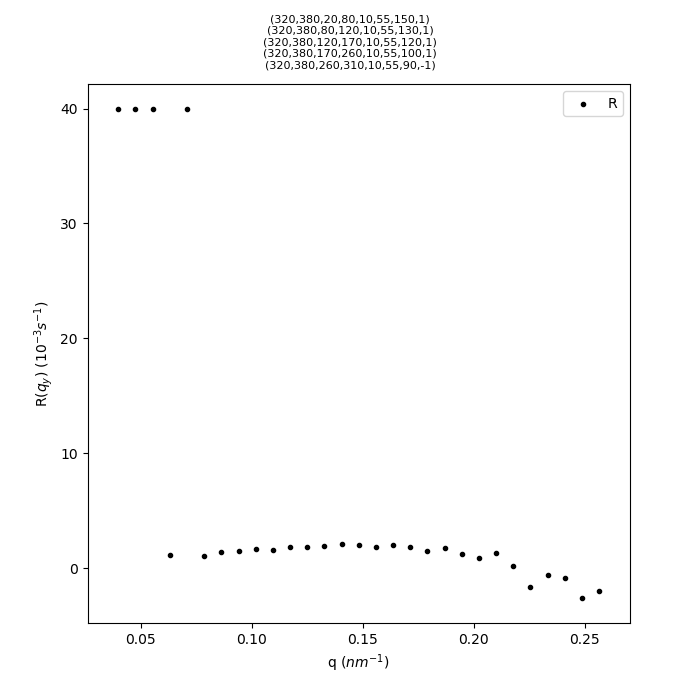

the figure is not saved automatically. Please save manually


<IPython.core.display.Javascript object>


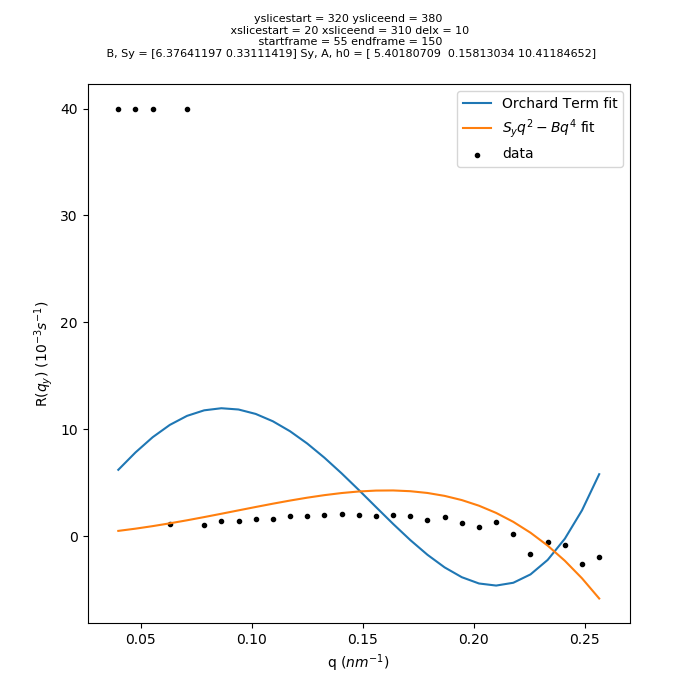

In [172]:
Ra=read_and_get_R_along_q_parallel(320,380,20,80,10,55,150,1)
Rb= read_and_get_R_along_q_parallel(320,380,80,120,10,55,130,1)
Rc=read_and_get_R_along_q_parallel(320,380,120,170,10,55,120,1)
Rd=read_and_get_R_along_q_parallel(320,380,170,260,10,55,100,1)
Re= read_and_get_R_along_q_parallel(320,380,260,310,10,55,90,-1)

Rmodified = stitch(stitch(stitch(stitch(Ra,Rb),Rc),Rd),Re)
np.save('Rvaluesmodified_PM20190203',Rmodified)
plotRs_manuallabel(Rmodified, '(320,380,20,80,10,55,150,1)'+
                   '\n(320,380,80,120,10,55,130,1)'+
                   '\n(320,380,120,170,10,55,120,1)'+
                   '\n(320,380,170,260,10,55,100,1)'+
                   '\n(320,380,260,310,10,55,90,-1)'+
                   '\n',11)
plotandfit_R(Rmodified,320,380,20,310,10,55,150)

In [11]:
array1 = [1, 6, 1, 1, 1, 2, 2] 
bin = np.bincount(array1,[0,0,0,1,1,0,0]) 
print("Bincount output  : \n ", bin) 

Bincount output  : 
  [0. 2. 0. 0. 0. 0. 0.]


<IPython.core.display.Javascript object>


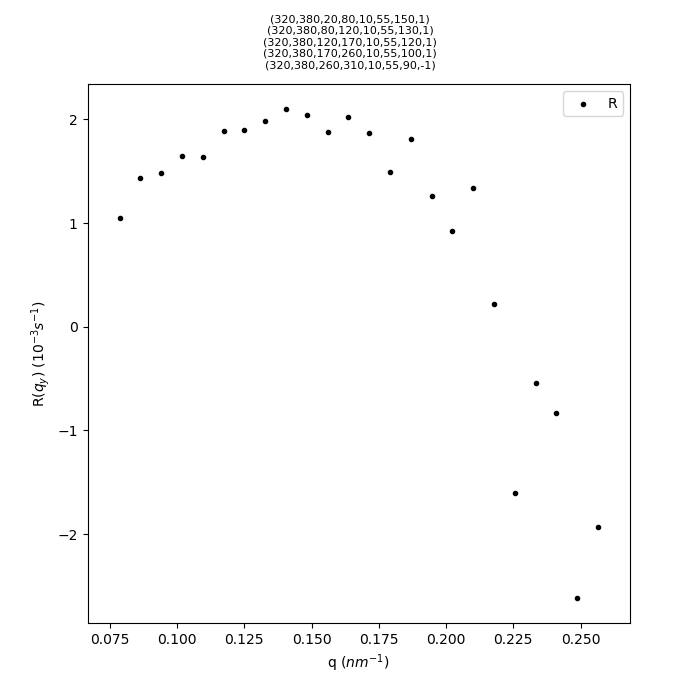

the figure is not saved automatically. Please save manually


<IPython.core.display.Javascript object>


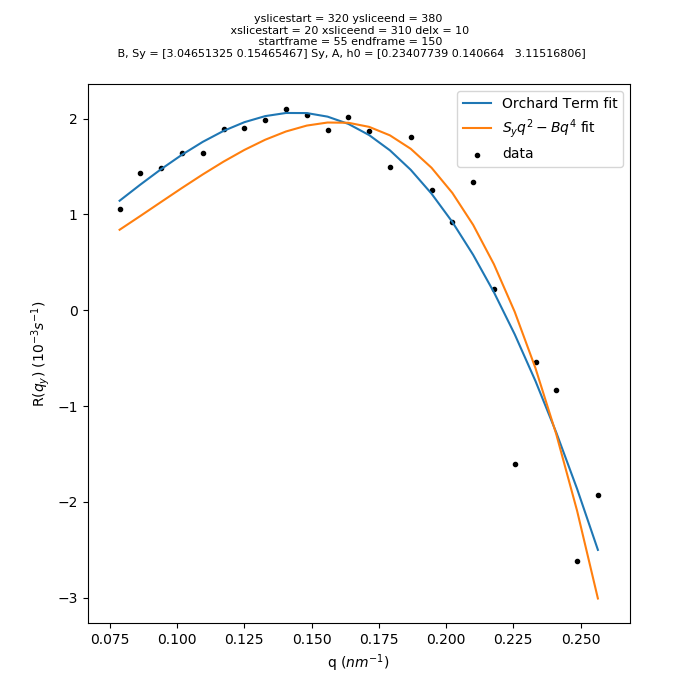

In [174]:
plotRs_manuallabel(Rmodified[5:], '(320,380,20,80,10,55,150,1)'+
                   '\n(320,380,80,120,10,55,130,1)'+
                   '\n(320,380,120,170,10,55,120,1)'+
                   '\n(320,380,170,260,10,55,100,1)'+
                   '\n(320,380,260,310,10,55,90,-1)'+
                   '\n',11)
plotandfit_R(Rmodified[5:],320,380,20,310,10,55,150)
#plotandfit_R_constraint(Rmodified,320,380,20,310,10,55,150)

<IPython.core.display.Javascript object>


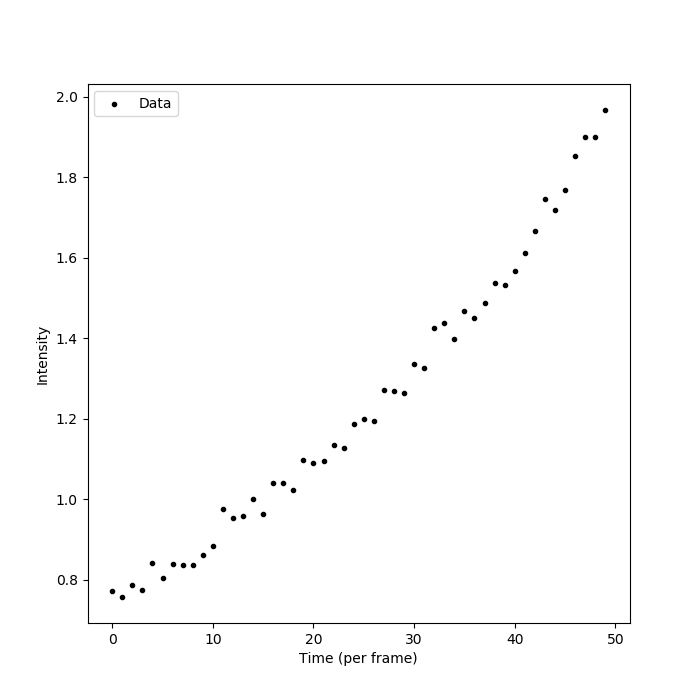

total time: 0.16521191596984863


In [43]:
#ta = time.time()


Is=np.zeros((70-20,2))
ii,jj=np.where(mask==1)
pos = 0
yslicestart=250
ysliceend=350
xslicestart=100
xsliceend=120
for i in tqdm(range(20,70)):
    img = DD.FD.rdframe(i)
    Is[pos,0] = pos #labelling time since it will be useful for fitting with log later .. use either i or pos here
    Is[pos,1] = (np.sum(img[yslicestart:ysliceend,xslicestart:xsliceend]))/((ysliceend-yslicestart)*(xsliceend-xslicestart))
    pos += 1
#    print(DD.FD.rdframe(i)[ii,jj])
 
plt.figure(figsize=(7,7))
#plt.plot(Is,color='black', marker='.')
plt.scatter(Is[:,0], Is[:,1], color = 'black', marker = '.', label='Data')
#plt.plot(Is[:,0], test_func(Is[:,0], params[0], params[1], params[2], params[3]),label='Fitted function')
plt.ylabel('Intensity')
plt.xlabel('Time (per frame)')
plt.legend(loc='best')
plt.show()
Is
#tb = time.time()
print('total time: {0}'.format(tb-ta))

    

parameters are [-6.96733612e+00  5.76739782e-02 -7.50283498e+03  9.26320000e-01]


/Users/pecomyint/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


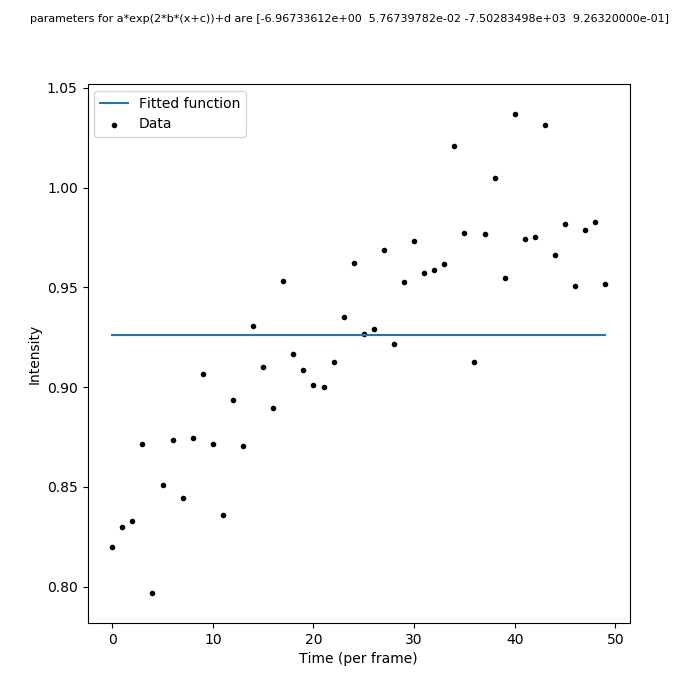

total time: 0.6536450386047363
[[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


In [141]:
from scipy import optimize

def test_func(x, a, b, c, d):
    return a * np.exp(2*b*(x+c)) + d


params, params_covariance = optimize.curve_fit(test_func, Is[:,0], Is[:,1], p0=[.1, -0.005,0,0]) 

print('parameters are {0}'.format(params))

plt.figure(figsize=(7,7))
#plt.plot(Is,color='black', marker='.')
plt.scatter(Is[:,0], Is[:,1], color = 'black', marker = '.', label='Data')
plt.plot(Is[:,0], test_func(Is[:,0], params[0], params[1],params[2], params[3]),label='Fitted function')
plt.ylabel('Intensity')
plt.xlabel('Time (per frame)')
plt.legend(loc='best')
plt.suptitle('parameters for a*exp(2*b*(x+c))+d are {0}'.format(params), fontsize=8)
plt.show()
print('total time: {0}'.format(tb-ta))
print(params_covariance)

<IPython.core.display.Javascript object>


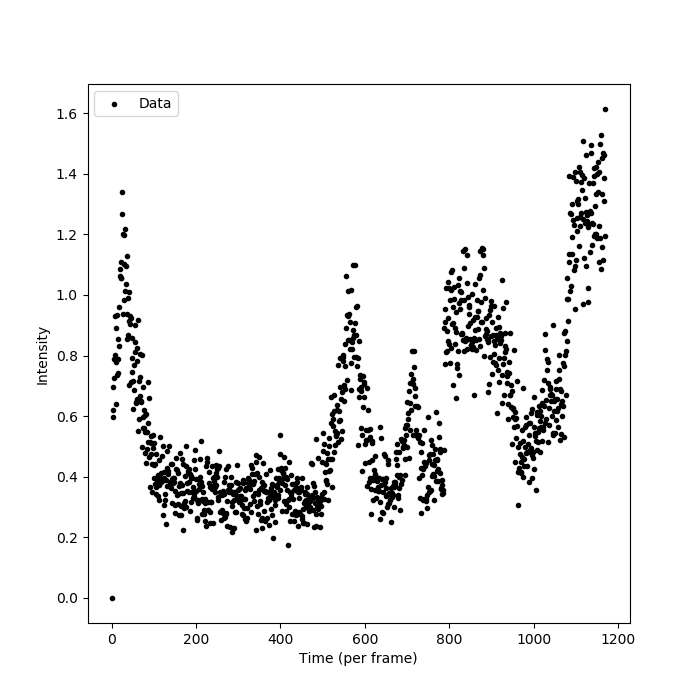

array([[1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 6.20000000e-01],
       [3.00000000e+00, 5.96666667e-01],
       ...,
       [1.16800000e+03, 1.31000000e+00],
       [1.16900000e+03, 1.19333333e+00],
       [1.17000000e+03, 1.61333333e+00]])

In [13]:
plt.figure(figsize=(7,7))
#plt.plot(Is,color='black', marker='.')
plt.scatter(Is[:,0], Is[:,1], color = 'black', marker = '.', label='Data')
#plt.plot(Is[:,0], test_func(Is[:,0], params[0], params[1], params[2], params[3]),label='Fitted function')
plt.ylabel('Intensity')
plt.xlabel('Time (per frame)')
plt.legend(loc='best')
plt.show()
Is

<IPython.core.display.Javascript object>


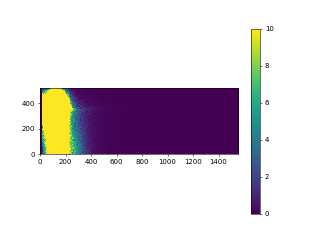

<IPython.core.display.Javascript object>


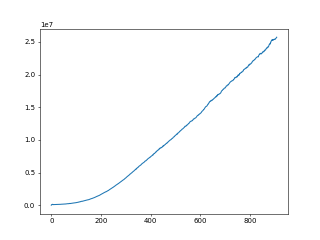

In [13]:
#get analysis routines, load individually for demonstration
from crosscor import * #cross correlator
from partitions import mkpartlist,partition1d,partition2d #partitioning aides
from ldparts import ldparts #read images using partitions
from h2t import h2t,avgg2 #two time correlations

Must first partition images into bins to be used by the code. Will use 20x20 boxes in pixel
index space. Should use qx,qz boxes.

In [99]:
pixellist=np.where(DD.mask.ravel()==1)[0] #list of valid pixels
#partition in bins using x,y (i,j) indices
yy,xx=np.unravel_index(pixellist,DD.mask.shape)
'''
row,columns (516, 1556)

y axis = rows 
x axis = columns
(y,x) ???
'''
ylist=mkpartlist(np.arange(260,380,20)) # break points for bins in y
xlist=mkpartlist(np.arange(20,160,20)) # break points for bins in x
print(xlist,ylist) #bins are list[0]<=b<list[1], list[2]<b<list[3] etc

[ 20.  40.  40.  60.  60.  80.  80. 100. 100. 120. 120. 140.] [260. 280. 280. 300. 300. 320. 320. 340. 340. 360.]


In [94]:
print(np.shape(np.arange(100,200,20)))
np.shape(np.zeros(np.shape(np.arange(100,200,20))))
len(np.arange(100,200,20))


(5,)


5

In [101]:
#combine partition lists into joint lists of valid pixels. IE bins
# are boxes in x,y space.

plist,bind,xbind,ybind,noperbin,inpixellist,binlist,binxlist,binylist=\
    partition2d(pixellist,xx,xlist,yy,ylist)
#inputs are:
    #pixellist list of valid pixels
    #xx x (or i) co-ordinate in image
    #xlist partition points in x
    #yy y (or j) co-ordinate in image
    #ylist partition points in y
#outputs are:
    #plist list of pixels in chosen partitions
    #bind bin (or partition) index of pixels
    #xbind x-bin index of pixel
    #ybind y-bin index of pixels
    #noperbin list of number of pixels in each bind
    #inpixellist index into pixellist (ie plist=pixellist[inpixellist])
    #binlist list of bins (is [0,..,maximum bin])
    #binxlist x bin for each bin
    #binylist y bin for each bin

#look at them.
print(noperbin)
print(binlist.shape,binylist,binxlist)

[400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400
 400 400 400 400 400 400 400 400 400 400 400 400]
(30,) [0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4] [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]


In [102]:
print(plist)

[404580 404581 404582 ... 558741 558742 558743]


<IPython.core.display.Javascript object>


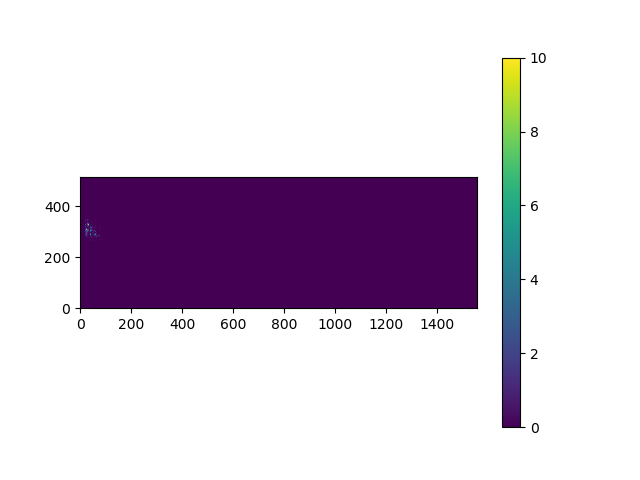

In [103]:
#how to look at partitions
ii=0*avgimg
ii[np.unravel_index(plist,ii.shape)]=bind+1 #bind==0 is not a bin
#alternately use: ii.ravel()[plist]=bind
figure()
imshow(ii*avgimg,vmax=10)
plt.colorbar()

In [104]:
#make a q-q cross correlations. First define correlation function.
%time CC = crosscor(img.shape,mask=ii,normalization="symavg")
CC.centers[15]


100%|██████████| 30/30 [00:00<00:00, 825.87it/s]

CPU times: user 61.5 ms, sys: 6.38 ms, total: 67.9 ms
Wall time: 58.4 ms


array([10, 10])

In [105]:
# Choose images to test correlations on.
img1=DD.FD.rdframe(750)
img2=DD.FD.rdframe(100)

In [106]:
#run the correlations. Calculations are for each partition.
%time rr=CC(img1,img2)
print(len(rr))

CPU times: user 123 ms, sys: 5.68 ms, total: 128 ms
Wall time: 79.8 ms
30


Show how to least squares fit speckles.

In [107]:
# %load gauss2d.py #show fitting function
import numpy as np
#2D Gaussian functions
def gauss2d(xy,p):
    X=xy[0] #from xx,yy=np.meshgrid(np.arange(xdim),np.arange(ydim),indexing='ij')
            # and calling in curfit with (xx,yy).
    Y=xy[1]
    amp=p[0]  #peak amplitude
    xc=p[1] #x-center
    yc=p[2] #y-center
    xsig=p[3] #x sigma
    ysig=p[4] #y sigma
    bgd=p[5] #back ground constant
    X=(X-xc)/xsig
    Y=(Y-yc)/ysig
    f=amp*np.exp(-X*X/2-Y*Y/2)+bgd
    return(f.ravel()) #curfit wants 1D array


In [108]:
#show how to run least squares fits to speckles
from curfit import *

In [111]:
#Show an eample, fit
idno=15
guess=r_[.2,10.,10,.4,.4,1.1]
xx,yy=np.meshgrid(np.arange(20),np.arange(20))
sigy=.1*np.ones_like(rr[idno]).ravel()
chisq, afit,sigmaa,resids =\
    curfit((xx,yy),rr[idno].ravel(),sigy,guess,\
    function_name=gauss2d,adj=r_[0,1,2])

<IPython.core.display.Javascript object>


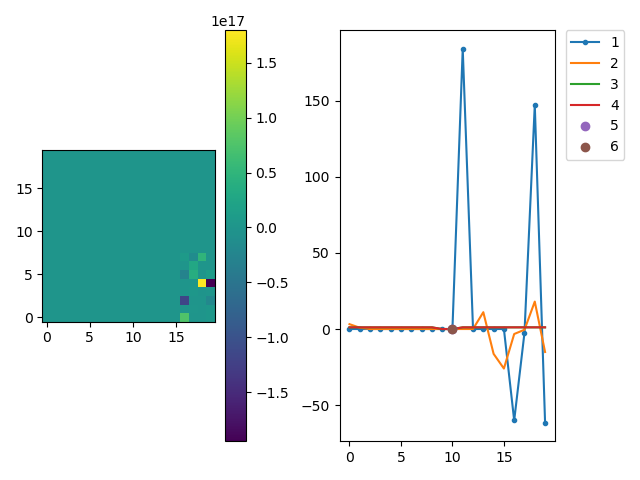

In [118]:
#plot resulting fit
fitrr=gauss2d((xx,yy),afit).reshape(20,20)
fig,(ax0,ax1)=plt.subplots(1,2)
idno=5
p1=ax0.imshow(rr[idno])
plt.colorbar(p1,ax=ax0)
ax1.plot(rr[idno][CC.centers[idno,0],:],'.-',label="1")
ax1.plot(rr[idno][:,CC.centers[idno,1]],label="2")
ax1.plot(fitrr[CC.centers[idno,0],:],label="3")
ax1.plot(fitrr[:,CC.centers[idno,1]],label="4")
ax1.plot(CC.centers[idno,1],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o',label="5")
ax1.plot(CC.centers[idno,0],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o',label="6")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#ax1.set_ylim(.9,1.4)

Note for these sharp speckles, 2D-Gaussian's don't work well.

In [119]:
#fit all of them anyway
res=np.zeros((len(rr),7))
for idno in tqdm(np.arange(len(rr))):
    try:
        chisq, afit,sigmaa,resids =\
            curfit((xx,yy),rr[idno].ravel(),sigy,guess,\
            function_name=gauss2d,adj=r_[0,1,2,5])
        newguess=guess.copy()
        newguess[[0,1,2,5]]=afit[[0,1,2,5]]
        chisq, afit,sigmaa,resids =\
            curfit((xx,yy),rr[idno].ravel(),sigy,newguess,\
            function_name=gauss2d)
        res[idno,0]=chisq
        res[idno,1:]=afit
    except:
        print(idno)
        res[idno,0]=0.0
        pass


100%|██████████| 30/30 [00:00<00:00, 181.48it/s]

5


<IPython.core.display.Javascript object>


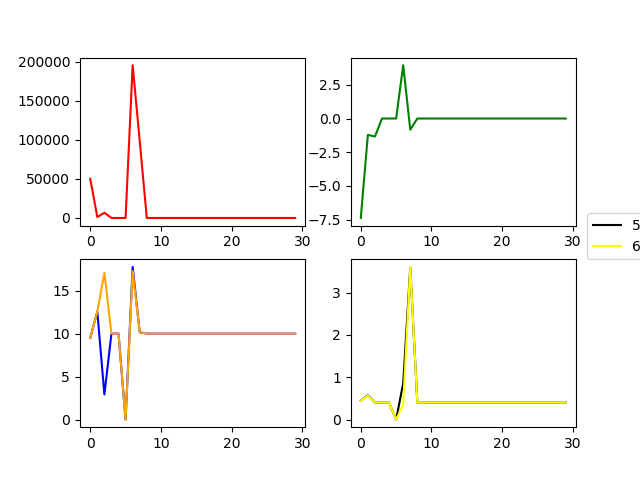

In [120]:
#plot fit results, Again not very good.
ig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
ax0.plot(res[:,0],color='red',label="1")
ax1.plot(res[:,1],color='green',label="2")
ax2.plot(res[:,2],color='blue',label="3")
ax2.plot(res[:,3],color='orange',label="4")
ax3.plot(res[:,4],color='black',label="5")
ax3.plot(res[:,5],color='yellow',label="6")
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)


In [23]:
res=np.zeros((3,7))
res[0,0]=2
res[0,1:]=np.array([1., 3., 5., 7., 0., 0.])
res

array([[2., 1., 3., 5., 7., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [29]:
res[0,0::3]

array([2., 5., 0.])

In [30]:
res[0,:]

array([2., 1., 3., 5., 7., 0., 0.])

In [20]:
#print(res)
#print(np.zeros((3,7))[:,0])
a = np.random.rand(3,7)
print(a,"hi",a[:,3],a[:,4],a[:,5]) #this is choosing the columns

[[0.29210658 0.29645379 0.09799406 0.58908761 0.03243165 0.33337083
  0.95006925]
 [0.02889583 0.27676109 0.20566867 0.30983739 0.53944332 0.88489423
  0.51436042]
 [0.52248232 0.62421335 0.09622335 0.48456347 0.59486121 0.03078368
  0.1755102 ]] hi [0.58908761 0.30983739 0.48456347] [0.03243165 0.53944332 0.59486121] [0.33337083 0.88489423 0.03078368]


### Quadratic calculation from three points.

Problems with least squares fits, let's try a simple quadratic fit to three points.

Assume a quadratic $f(x,y)=a(x-x_c)^2+b(y-y_c)^2+c$ and set $f_{-1} = f(x-1,y)$, $f_0=f(x,y)$ and $f_1=f(x+1,y)$
where $f(x,y)$ is maximum value.
Then $a=(f_{-1}+f_1-2f_0)/2$, $x_c=(f_{-1}-f_1)/(4a)$ and $c=f_0-a*x_c^2$. There is a similar calculation for
the three points in the $y$ direction.

Like in stat. mech. we can estimate $\sigma_x^2 = -f_0/(\partial^2 f /\partial x^2) = -(c-1)/(2a)$. 
Or assuming $c=1+\beta$, solve $-a(\delta x)^2=(c-1)$/2 for $\delta x$ and FWHM=$2\delta x$. Intererestingly,
both give the same formula.

In [121]:
#Show how this works for an example
a=rr[idno] #speckle cross cor
#solve by quadratic on 3 points
print(res[idno,:]) #fit results
p=np.unravel_index(np.argmax(a, axis=None), a.shape) #position of max
ax=(a[p[0]-1,p[1]]+a[p[0]+1,p[1]]-2*a[p[0],p[1]])/2.
dx=(a[p[0]-1,p[1]]-a[p[0]+1,p[1]])/4./ax
cx=a[p[0],p[1]]-ax*dx*dx
ay=(a[p[0],p[1]-1]+a[p[0],p[1]+1]-2*a[p[0],p[1]])/2.
dy=(a[p[0],p[1]-1]-a[p[0],p[1]+1])/4./ay
cy=a[p[0],p[1]]-ay*dy*dy
fwhmx=2*np.sqrt(-((cx+cy)/2.-1)/2./ax) 
fwhmy=2*np.sqrt(-((cx+cy)/2.-1)/2./ay) 
#print(ax,dx,cx,ay,dy,cy)
dp=r_[dx,dy] #shif
print(p,p+dp)
print(a[p[0],p[1]],res[idno,1]+res[idno,6],cx,cy,(cx+cy)/2.)
print(res[idno,[4,5]],2*np.sqrt(-(cx-1)/ax/2.),2*np.sqrt(-(cy-1)/ay/2.),fwhmx,fwhmy)

[ 3.11671244e-92  3.34015406e-47  1.00000000e+01  1.00000000e+01
  4.00000000e-01  4.00000000e-01 -1.75400184e-47]
(0, 0) [nan nan]
0.0 1.5861522172042135e-47 nan nan nan
[0.4 0.4] nan nan nan nan


Read_A012.py:7: RuntimeWarning: invalid value encountered in double_scalars
  """
Read_A012.py:10: RuntimeWarning: invalid value encountered in double_scalars
  


In [125]:
#Let's calulate for all of them
res1=np.zeros((len(rr),5))
idno=0
for j in tqdm(range(len(rr))):
    a=rr[j]
    p=r_[5,5]+np.unravel_index(np.argmax(a[5:-5,5:-5], axis=None), (10,10))
    ax=(a[p[0]-1,p[1]]+a[p[0]+1,p[1]]-2.0*a[p[0],p[1]])/2.0
    dx=(a[p[0]-1,p[1]]-a[p[0]+1,p[1]])/4.0/ax
    cx=a[p[0],p[1]]-ax*dx*dx
    ay=(a[p[0],p[1]-1]+a[p[0],p[1]+1]-2*a[p[0],p[1]])/2.
    dy=(a[p[0],p[1]-1]-a[p[0],p[1]+1])/4./ay
    cy=a[p[0],p[1]]-ay*dy*dy
    res1[idno,:]=r_[(cx+cy)/2.,p[0]+dx,p[1]+dy,np.sqrt(-cx/2/ax),np.sqrt(-cy/2/ay)]
    idno += 1


  0%|          | 0/30 [00:00<?, ?it/s]Read_A012.py:8: RuntimeWarning: invalid value encountered in double_scalars
  #read in information for an .imm file
Read_A012.py:11: RuntimeWarning: invalid value encountered in double_scalars
  from io_imm import Immfile,rdmask,ldimgs

100%|██████████| 30/30 [00:00<00:00, 2279.80it/s]

<IPython.core.display.Javascript object>


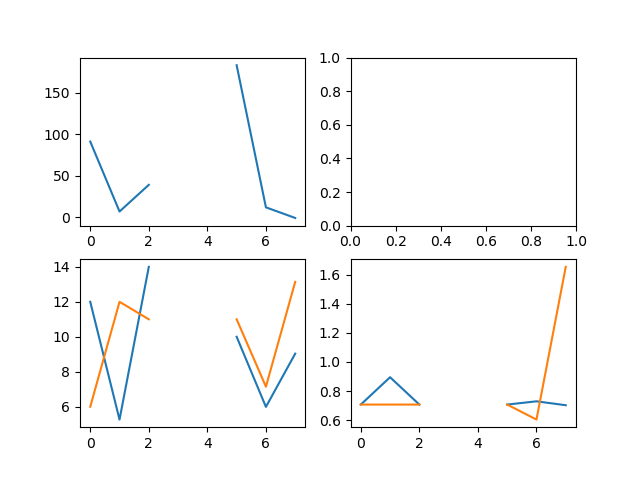

In [126]:
#plot results beta,px,py,sx,sy
#note how shift in speckle peaks occurs between these two images.
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
ax0.plot(res1[:,0]-1.0) #beta
ax2.plot(res1[:,1]) #center in x
ax2.plot(res1[:,2]) #center in y
ax3.plot(res1[:,3]) #width in x
ax3.plot(res1[:,4]) #width in y

<IPython.core.display.Javascript object>


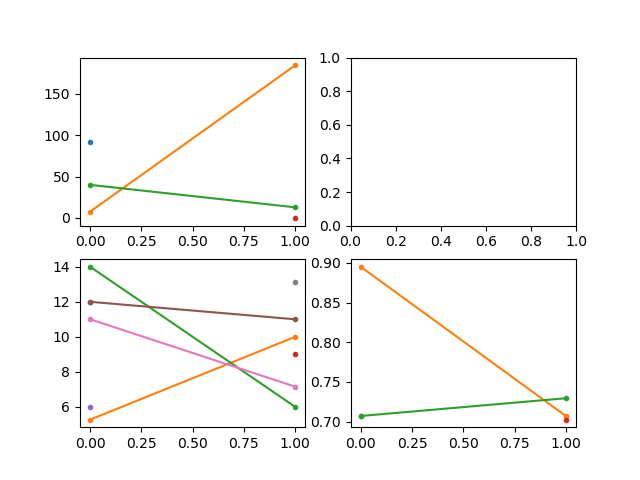

In [127]:
#plot in qx segments. Ie plot separated by boxes for
# four values of y
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
ax0.plot(res1[0::4,0],'.-')
ax0.plot(res1[1::4,0],'.-')
ax0.plot(res1[2::4,0],'.-')
ax0.plot(res1[3::4,0],'.-')
ax2.plot(res1[0::4,1],'.-')
ax2.plot(res1[1::4,1],'.-')
ax2.plot(res1[2::4,1],'.-')
ax2.plot(res1[3::4,1],'.-')
ax2.plot(res1[0::4,2],'.-')
ax2.plot(res1[1::4,2],'.-')
ax2.plot(res1[2::4,2],'.-')
ax2.plot(res1[3::4,2],'.-')
ax3.plot(res1[0::4,3],'.-')
ax3.plot(res1[1::4,3],'.-')
ax3.plot(res1[2::4,3],'.-')
ax3.plot(res1[3::4,3],'.-')

CPU times: user 176 ms, sys: 9.81 ms, total: 186 ms
Wall time: 158 ms


<IPython.core.display.Javascript object>


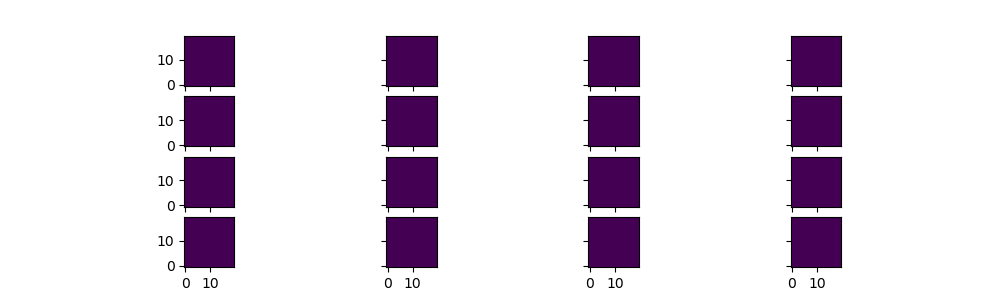

In [145]:
#plot each cross-correlation for each box.
img1=DD.FD.rdframe(750)
img2=DD.FD.rdframe(750)
%time rr=CC(img1,img2)
fig,axs=plt.subplots(4,4,sharex=True,sharey=True)
fig.set_size_inches(10,3)
for j in range(4):
    for i in range(4):
        idno == j+i*4
        p1=axs[i,j].imshow(rr[idno],vmin=0,vmax=1)

In [25]:
ylist=mkpartlist(np.arange(100,500,20)) # break points for bins in y
xlist=mkpartlist(np.arange(10,210,20)) # break points for bins in x

Look at central boxes versus time. IE for the four y-boxes near center.

In [134]:
#chose and define the four partitions
pixellist=np.arange(img.size)
yy,xx = np.indices(img.shape)
ylist=mkpartlist(np.arange(260,380,20),width=20)
xlist=mkpartlist(np.arange(20,160,20),width=20)
print(xlist,ylist)
plist,bind,xbind,ybind,noperbin,inpixellist,binlist,binxlist,binylist=\
    partition2d(pixellist,xx.ravel(),xlist,yy.ravel(),ylist)
print(noperbin)
print(binlist.shape,binylist,binxlist)
ii=-1+0*avgimg #make bind==0 stand out
ii[np.unravel_index(plist,ii.shape)]=bind

[ 10.  30.  30.  50.  50.  70.  70.  90.  90. 110. 110. 130. 130. 150.] [250. 270. 270. 290. 290. 310. 310. 330. 330. 350. 350. 370.]
[400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400
 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400 400
 400 400 400 400 400 400]
(42,) [0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0
 1 2 3 4 5] [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6
 6 6 6 6 6]


In [135]:
#correlate frame 750 versus frames 1 to n.
img1=DD.FD.rdframe(200) #reference (in middle)
beg=DD.DD['firstfile']
no=DD.DD['numberfiles']
res2=np.zeros((4,no-1,5))
CC = crosscor(img.shape,mask=ii+1,normalization="symavg")
for imgno in tqdm(np.arange(beg,beg+no-1)):
    img2=DD.FD.rdframe(imgno)
    cx=a[p[0],p[1]]-ax*dx*dx
    rr=CC(img1,img2)
    for j in range(4):
        a=rr[j]
        p=r_[5,5]+np.unravel_index(np.argmax(a[5:-5,5:-5], axis=None), (10,10))
        ax=(a[p[0]-1,p[1]]+a[p[0]+1,p[1]]-2*a[p[0],p[1]])/2.
        dx=(a[p[0]-1,p[1]]-a[p[0]+1,p[1]])/4./ax
        ay=(a[p[0],p[1]-1]+a[p[0],p[1]+1]-2*a[p[0],p[1]])/2.
        dy=(a[p[0],p[1]-1]-a[p[0],p[1]+1])/4./ay
        cy=a[p[0],p[1]]-ay*dy*dy
        res2[j,imgno-5,:]=r_[(cx+cy)/2.,p[0]+dx,p[1]+dy,np.sqrt(-cx/2/ax),np.sqrt(-cy/2/ay)]


  0%|          | 0/1204 [00:00<?, ?it/s]Read_A012.py:15: RuntimeWarning: invalid value encountered in double_scalars
  #
Read_A012.py:17: RuntimeWarning: invalid value encountered in double_scalars
  DD.DD={}

  0%|          | 5/1204 [00:00<02:58,  6.73it/s]Read_A012.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  DD.DD['filename'] = DD.DD['pdir']+'A012_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001_00001-04000.imm'
Read_A012.py:19: RuntimeWarning: invalid value encountered in sqrt
  DD.DD['filename'] = DD.DD['pdir']+'A012_sample3_Si_Ion65deg_2kev_f3_7p6EN5_0p20deg_001_00001-04000.imm'

 34%|███▎      | 405/1204 [00:48<01:35,  8.35it/s]


 67%|██████▋   | 806/1204 [01:40<00:49,  8.00it/s]


100%|██████████| 1204/1204 [02:18<00:00,  8.68it/s]

In [172]:
#correlate frame 750 versus frames 1 to n.
beg=DD.DD['firstfile']
no=DD.DD['numberfiles']
res2=np.zeros((no-1,2))
CC = crosscor(img.shape,mask=ii+1,normalization="symavg")
for imgno in tqdm(np.arange(beg,beg+no-1)):
    img2=DD.FD.rdframe(imgno)
    img1=DD.FD.rdframe(no-imgno) 
    #cx=a[p[0],p[1]]-ax*dx*dx
    rr=CC(img1,img2)
    res2[imgno-1,:] = [imgno,np.mean(rr[20])]
plot(res2)


 41%|████      | 491/1204 [00:47<01:09, 10.30it/s]


 71%|███████   | 849/1204 [01:27<00:36,  9.70it/s]


100%|█████████▉| 1203/1204 [02:06<00:00,  9.54it/s]

IndexError: index 1204 is out of bounds for axis 0 with size 1204

(1204,)


<IPython.core.display.Javascript object>


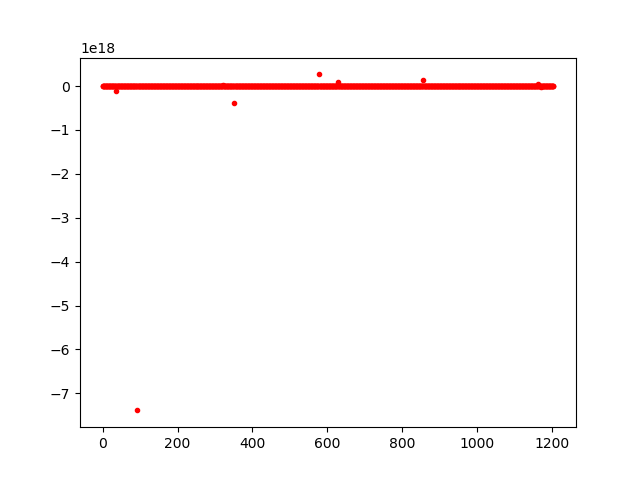

In [204]:
print(np.shape(res2[:,0]))
import matplotlib.pyplot as plt
figure()
plt.plot(res2[:,1], 'r.')
#plt.ylim(-1,0.2)
plt.show()

In [80]:
# x=300
# y=300
x=318.8192
y=209.8499
ccdx=190
ccdz=89

x0=727.8054
y0=240.9691
ccdx0=212.5
ccdz0=36.5
d=3930
E=10.91*1.602*1E-16
alpha_i=0.2*(np.pi/180)

Psi = ((ccdx0 - ccdx)*(1E-3) + (x - x0)*(55*1E-6)) / (d*1E-3)
alpha_f = ((ccdz-ccdz0)+((y0-y)*(0.055)))/d #((ccdz - ccdz0)*(1E-3) + (y - y0)*(55E-6)) / (d*1E-3)

#specular

print(alpha_f*(180/np.pi))

# h = 6.62607 * 1E-34
# c = 3E8
# lambda_ = h*c/E
# Psi = Psi*(np.pi/180)
# alpha_f = alpha_f*(np.pi/180)
# q_x = ((2*np.pi)/lambda_)*(np.cos(alpha_f)*np.cos(Psi)-np.cos(alpha_i))
# q_y = ((2*np.pi)/lambda_)*(np.cos(alpha_f)*np.sin(Psi))
# q_z = ((2*np.pi)/lambda_)*(np.sin(alpha_i)+np.sin(alpha_f))

# #convert m^-1 to nm^-1
# q_x,q_y,q_z = q_x*1E-9,q_y*1E-9,q_z*1E-9
# #calculate q magnitude


0.790354544436925


<IPython.core.display.Javascript object>


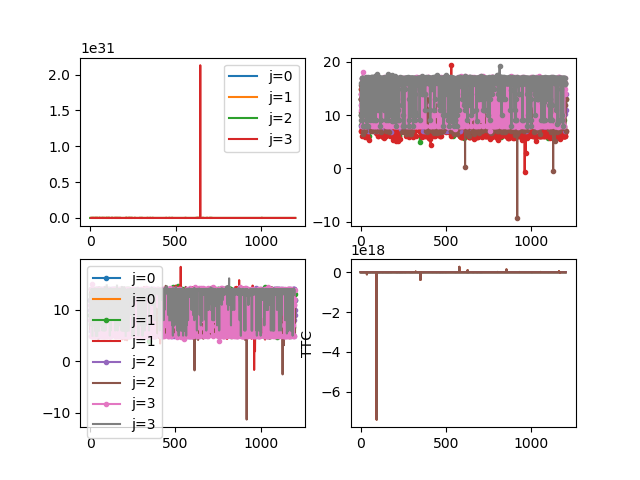

In [151]:
#plot results beta,px,py,sx,sy
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
for j in range(4):
    ax0.plot(res2[j,:,0]-1.0,label="j=%d"%j)#beta
    ax2.plot(res2[j,:,2],'.-',label="j=%d"%j)#center x
    ax3.plot(res2[j,:,3]+j,label="j=%d"%j)#width x
    ax2.plot(res2[j,:,1],label="j=%d"%j)#center y
    ax3.plot(res2[j,:,4]+j,label="j=%d"%j)#width y
    ax1.plot(res2[j,:,2]+j,'.-',label="j=%d"%j) #center x with offset
    ax1.plot(res2[j,:,1]+j,'.-',label="j=%d"%j) #center y with offset
    ax0.legend()
    ax2.legend()

<IPython.core.display.Javascript object>


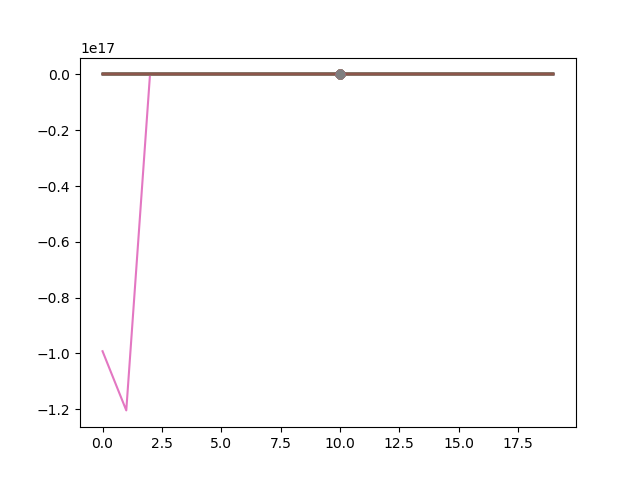

In [137]:
#Show speckles
figure()
for idno in range(len(rr)):
    plot(rr[idno][CC.centers[idno,0],:])
    plot(rr[idno][:,CC.centers[idno,1]])
    plot(CC.centers[idno,1],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o')
    plot(CC.centers[idno,0],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o')


In [84]:
for i in range(150):
    print(convert_pixel_to_q(10*i,300,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i))

convert_pixel_to_q(1400,300,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)
#convert_pixel_to_q(1500,300,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)

(-0.0008999525888252602, 0.020673432185300225, 0.5618835125527337, 0.5622644239070976)
(-0.0009033868087125142, 0.028404691886454204, 0.5618835125527337, 0.5626017457380386)
(-0.0009079030114661959, 0.036135951031280804, 0.5618835125527337, 0.5630450363189533)
(-0.000913501197006571, 0.04386720946835769, 0.5618835125527337, 0.5635940455945003)
(-0.0009201813652171056, 0.05159846704626223, 0.5618835125527337, 0.5642484649636782)
(-0.0009279435159812653, 0.05932972361357193, 0.5618835125527337, 0.5650079281406852)
(-0.0009367876491273152, 0.06706097901886421, 0.5618835125527337, 0.5658720121694182)
(-0.0009467137644957875, 0.0747922331107168, 0.5618835125527337, 0.5668402385851218)
(-0.0009577218618904139, 0.0825234857377072, 0.5618835125527337, 0.5679120747158528)
(-0.0009698119410903926, 0.09025473674841283, 0.5618835125527337, 0.5690869351156503)
(-0.000982984001862655, 0.0979859859914116, 0.5618835125527337, 0.5703641831206226)
(-0.0009972380439495993, 0.10571723331528099, 0.56188351

(-0.01190807228172134,
 1.1029766050339211,
 0.5618835125527337,
 1.2379064080600841)